# Тема проекта: анализ рынка автомобилей типа "седан"c использованием данных с сайта auto.ru

# 0. Актуальность выбранной темы

    Говоря об актульности данной темы, можно сказать, что в нынешной ситуации она становится всё востребованее и востребованее. В связи с тем, что известные бренды машин ушли из России и остановили своё производство и продажи в официальных салонах, люди начали всё чаще и чаще выбирать и покупать себе машины на разных интернет сервисах, таких как авто.ру

    Более того, можно с уверенностью сказать, что анализировать рынок машин очень интересно. Поставить гипотезу, доказать её или опровергнуть будет настоящим исследованием, потому что такой сегмент не есть очевидный.

#  1. Парсинг данных
    
    Парсить будем по частям (все данные не вмещаются в 99 страниц auto.ru), используя библиотеку BeautifulSoup4.

In [56]:
import numpy as np

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


df = pd.DataFrame(columns=['Название', 'Марка', 'Модель', 'Пробег, км', 'Мощность двигателя, л','Мощность двигателя, л.с', 'Год выпуска', 'Цена, руб', 'Цвет кузова', 'Коробка передач','Привод', 'Тип топлива','Город продажи'])

for page in range(1,94):

    url = f"https://auto.ru/cars/all/?catalog_filter=mark%3DAUDI%2Cmodel%3DA4%2Cgeneration%3D20637504&catalog_filter=mark%3DMERCEDES%2Cmodel%3DE_KLASSE%2Cgeneration%3D20743500&catalog_filter=mark%3DBMW%2Cmodel%3D5ER%2Cgeneration%3D20856169&catalog_filter=mark%3DMERCEDES%2Cmodel%3DS_KLASSE%2Cgeneration%3D22491729&catalog_filter=mark%3DBMW%2Cmodel%3D3ER%2Cgeneration%3D21398591&catalog_filter=mark%3DAUDI%2Cmodel%3DA6%2Cgeneration%3D21210593&page={page}"
    cookie = 'layout-config={\"screen_height\":1440,\"screen_width\":2560,\"win_width\":2545,\"win_height\":861}; from=direct; from_lifetime=1684001441347; gdpr=0; sso_status=sso.passport.yandex.ru:blocked; count-visits=11; _ym_d=1684001438; _ym_uid=1681200562636975776; safeframe-test-cookie_1684001438875_84_1=test; cycada=YSLSvbFiQygcruAbWj+TKQcmfcvC6eJUR+1FBVDSUlA=; _yasc=E2S73mQ7CwdlfpzTnefbdItMkxozenNwFkuUmRn3NVPhN2lgt0mWSeQqi2sT1g==; spravka=dD0xNjgzOTk2MzgyO2k9ODcuMjQwLjQ5LjI1MTtEPTY3M0QwODBDMTYwMkU3MEU3QzEwMzNGQkNENDA4NjFCNDAwMjdFNzlBQkQ0Mzc5NEUxMTZCRkMxMDY1RDFGNDQyRTJENjVFMzg2ODAwMjt1PTE2ODM5OTYzODIyODU5MDgxNzU7aD1iZjliMzAxNWVkMTMwYTM0Y2JiNTRlZjg0YTIzOTk2Zg==; popups-popup-pdd-spring-shown-count=1; listing_view=%7B%22output_type%22%3Anull%2C%22version%22%3A1%7D; listing_view_session={}; autoru-visits-count=1; gids=; gradius=200; L=cSR0Q3RjQX9DYEVXV0FbR0BuQV9idnhaJUE3AkotOFQ4IgIuEwZHARtRGCYA.1680275506.15298.330958.a60cf2711ba152838a1f7f495a70fb03; mda2_beacon=1683992077143; yandex_login=asbryuzgin@edu.hse.ru; ys=udn.cDphc2JyeXV6Z2luQGVkdS5oc2UucnU%3D#c_chck.3556194812; _ym_isad=2; autoru_sso_blocked=1; _csrf_token=f918fad396081a0fcbaa7e0cb59b54601eb972fd602e29de; my=YwA%3D; yandexuid=7636177771605955887; yuidlt=1; suid=8cde0a8b0d828f76b9479e2764000e9e.3851a07104d8ccc12fdc6e158c6896db'
    headers = {'User-Agent':'Mozilla/5.0 (iPad; CPU OS 16_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.0 YaBrowser/23.3.4.311.11 Mobile/15E148 Safari/604.1',
               'Accept':'*/*', 
               'Connection':'keep-alive',
               'Referer': 'https://www.google.com/',
               'Cache-Control': 'no-cache',
               'Upgrade-Insecure-Requests': '1',
               'If-None-Match': 'W/"2a-nG1r6lLq3nAKWlU+/B6Uhx9pU1c"',
               'Cookie' : cookie 
              }
    proxies = {'https':'135.181.101.187:8080'}
    response = requests.get(url, headers = headers)
    soup = BeautifulSoup(response.content, "html.parser")


    cars = soup.find_all('div', {'class': 'ListingItem__main'})
    
    for car in cars:
        
        TechSummary = car.find('div', {'class': 'ListingItemTechSummaryDesktop'})
        
        name = car.find('a', {'class': 'Link ListingItemTitle__link'}).text.strip()
        brand = name.split()[0]
        model = ' '.join(name.split()[1:])
        km = car.find('div', {'class': 'ListingItem__kmAge'}).text.replace('км','').strip()
        power = car.find('div', {'class': 'ListingItemTechSummaryDesktop__cell'}).text.split('\u2009')[0].replace('л','').strip()
        horse_power = car.find('div', {'class': 'ListingItemTechSummaryDesktop__cell'}).text.split('\u2009')[2].replace('\xa0л.с.','').strip()
        year = car.find('div', {'class': 'ListingItem__year'}).text
        price = car.find('div', {'class': 'ListingItemPrice__content'}).text.replace('₽','').strip()
        color = car.find_all('div', {'class': 'ListingItemTechSummaryDesktop__cell'})[4].text
        transmission = car.find_all('div', {'class': 'ListingItemTechSummaryDesktop__cell'})[1].text
        drivetrain = TechSummary.find_all('div', class_ = 'ListingItemTechSummaryDesktop__cell')[3].text
        fuel = car.find_all('div', {'class': 'ListingItemTechSummaryDesktop__cell'})[0].text.split('\u2009')[4]
        location = car.find('span', {'class': 'MetroListPlace__regionName MetroListPlace_nbsp'}).text
    
        df = df.append({'Название': name, 'Марка': brand, 'Модель': model, 'Пробег, км': km, 'Мощность двигателя, л': power,'Мощность двигателя, л.с':horse_power, 'Год выпуска': year, 'Цена, руб': price,
                        'Цвет кузова': color, 'Коробка передач': transmission, 'Привод': drivetrain, 'Тип топлива': fuel, 'Город продажи': location}, ignore_index = True)
    time.sleep(5)  

df

,Название,Марка,Модель,"Пробег, км","Мощность двигателя, л","Мощность двигателя, л.с",Год выпуска,"Цена, руб",Цвет кузова,Коробка передач,Привод,Тип топлива,Город продажи
0,BMW 3 серии 320d xDrive VII (G2x),BMW,3 серии 320d xDrive VII (G2x),40 000,2.0,190,2020,3 460 000,оранжевый,автомат,полный,Дизель,Санкт-Петербург
1,BMW 3 серии 330d VII (G2x),BMW,3 серии 330d VII (G2x),80 000,3.0,286,2019,3 350 000,синий,автомат,задний,Дизель,Санкт-Петербург
2,BMW 5 серии 530d xDrive VII (G30/G31),BMW,5 серии 530d xDrive VII (G30/G31),114 000,3.0,249,2017,3 960 000,синий,автомат,полный,Дизель,Челябинск
3,BMW 3 серии 320d xDrive VII (G2x),BMW,3 серии 320d xDrive VII (G2x),42 000,2.0,190,2021,4 500 000,белый,автомат,полный,Дизель,Москва
4,Audi A6 45 TDI V (C8),Audi,A6 45 TDI V (C8),38 000,3.0,249,2018,5 500 000,белый,автомат,полный,Дизель,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,Mercedes-Benz S-Класс 580 Long 4MATIC VII (W223),Mercedes-Benz,S-Класс 580 Long 4MATIC VII (W223),1 000,4.0,489,2022,9 010 000,белый,автомат,полный,Бензин,Находка
3501,BMW 5 серии 520d xDrive VII (G30/G31),BMW,5 серии 520d xDrive VII (G30/G31),33 000,2.0,190,2019,2 790 000,синий,автомат,полный,Дизель,Хабаровск
3502,BMW 3 серии M340i xDrive VII (G2x),BMW,3 серии M340i xDrive VII (G2x),28 000,3.0,374,2020,2 260 000,чёрный,автомат,полный,Бензин,Владивосток
3503,BMW 5 серии 520d xDrive VII (G30/G31),BMW,5 серии 520d xDrive VII (G30/G31),34 000,2.0,190,2019,3 790 000,белый,автомат,полный,Дизель,Владивосток


In [31]:
for page in range(1,95):

    url = f"https://auto.ru/cars/all/?catalog_filter=mark%3DMAZDA%2Cmodel%3D6%2Cgeneration%3D21357560&catalog_filter=mark%3DKIA%2Cmodel%3DK5%2Cgeneration%3D22462291&catalog_filter=mark%3DHYUNDAI%2Cmodel%3DELANTRA%2Cgeneration%3D22660173&catalog_filter=mark%3DMERCEDES%2Cmodel%3DCLA_KLASSE%2Cgeneration%3D21548553&catalog_filter=mark%3DKIA%2Cmodel%3DCERATO%2Cgeneration%3D21383450&catalog_filter=mark%3DHYUNDAI%2Cmodel%3DSOLARIS%2Cgeneration%3D20922677&page={page}"
    cookie = 'layout-config={\"screen_height\":1440,\"screen_width\":2560,\"win_width\":2545,\"win_height\":861}; from=direct; from_lifetime=1684005678164; gdpr=0; sso_status=sso.passport.yandex.ru:blocked; count-visits=12; _ym_d=1684005385; _ym_uid=1681200562636975776; cycada=OEv6FNld/tZvP6LFsEWUhAcmfcvC6eJUR+1FBVDSUlA=; _yasc=9tj2C9He38NjSmxqrz4aFDIdcekIkIttERtrhlmD0THsXDlioYXItMiBI6lerQ==; spravka=dD0xNjgzOTk2MzgyO2k9ODcuMjQwLjQ5LjI1MTtEPTY3M0QwODBDMTYwMkU3MEU3QzEwMzNGQkNENDA4NjFCNDAwMjdFNzlBQkQ0Mzc5NEUxMTZCRkMxMDY1RDFGNDQyRTJENjVFMzg2ODAwMjt1PTE2ODM5OTYzODIyODU5MDgxNzU7aD1iZjliMzAxNWVkMTMwYTM0Y2JiNTRlZjg0YTIzOTk2Zg==; popups-popup-pdd-spring-shown-count=1; listing_view=%7B%22output_type%22%3Anull%2C%22version%22%3A1%7D; listing_view_session={}; autoru-visits-count=1; gids=; gradius=200; L=cSR0Q3RjQX9DYEVXV0FbR0BuQV9idnhaJUE3AkotOFQ4IgIuEwZHARtRGCYA.1680275506.15298.330958.a60cf2711ba152838a1f7f495a70fb03; mda2_beacon=1683992077143; yandex_login=asbryuzgin@edu.hse.ru; ys=udn.cDphc2JyeXV6Z2luQGVkdS5oc2UucnU%3D#c_chck.3556194812; _ym_isad=2; autoru_sso_blocked=1; _csrf_token=f918fad396081a0fcbaa7e0cb59b54601eb972fd602e29de; my=YwA%3D; yandexuid=7636177771605955887; yuidlt=1; suid=8cde0a8b0d828f76b9479e2764000e9e.3851a07104d8ccc12fdc6e158c6896db'
    headers = {'User-Agent':'Mozilla/5.0 (iPad; CPU OS 16_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.0 YaBrowser/23.3.4.311.11 Mobile/15E148 Safari/604.1',
               'Accept':'*/*', 
               'Connection':'keep-alive',
               'Referer': 'https://www.google.com/',
               'Cache-Control': 'no-cache',
               'Upgrade-Insecure-Requests': '1',
               'If-None-Match': 'W/"2a-nG1r6lLq3nAKWlU+/B6Uhx9pU1c"',
               'Cookie' : cookie 
              }
    proxies = {'https':'135.181.101.187:8080'}
    response = requests.get(url, headers = headers)
    soup = BeautifulSoup(response.content, "html.parser")


    cars = soup.find_all('div', {'class': 'ListingItem__main'})
    
    for car in cars:
        
        TechSummary = car.find('div', {'class': 'ListingItemTechSummaryDesktop'})
        
        name = car.find('a', {'class': 'Link ListingItemTitle__link'}).text.strip()
        brand = name.split()[0]
        model = ' '.join(name.split()[1:])
        km = car.find('div', {'class': 'ListingItem__kmAge'}).text.replace('км','').strip()
        power = car.find('div', {'class': 'ListingItemTechSummaryDesktop__cell'}).text.split('\u2009')[0].replace('л','').strip()
        horse_power = car.find('div', {'class': 'ListingItemTechSummaryDesktop__cell'}).text.split('\u2009')[2].replace('\xa0л.с.','').strip()
        year = car.find('div', {'class': 'ListingItem__year'}).text
        price = car.find('div', {'class': 'ListingItemPrice__content'}).text.replace('₽','').strip()
        color = car.find_all('div', {'class': 'ListingItemTechSummaryDesktop__cell'})[4].text
        transmission = car.find_all('div', {'class': 'ListingItemTechSummaryDesktop__cell'})[1].text
        drivetrain = TechSummary.find_all('div', class_ = 'ListingItemTechSummaryDesktop__cell')[3].text
        fuel = car.find_all('div', {'class': 'ListingItemTechSummaryDesktop__cell'})[0].text.split('\u2009')[4]
        location = car.find('span', {'class': 'MetroListPlace__regionName MetroListPlace_nbsp'}).text
    
        df = df.append({'Название': name, 'Марка': brand, 'Модель': model, 'Пробег, км': km, 'Мощность двигателя, л': power,'Мощность двигателя, л.с':horse_power, 'Год выпуска': year, 'Цена, руб': price,
                        'Цвет кузова': color, 'Коробка передач': transmission, 'Привод': drivetrain, 'Тип топлива': fuel, 'Город продажи': location}, ignore_index = True)
    time.sleep(5) 

df

,Название,Марка,Модель,"Пробег, км","Мощность двигателя, л","Мощность двигателя, л.с",Год выпуска,"Цена, руб",Цвет кузова,Коробка передач,Привод,Тип топлива,Город продажи
0,BMW 3 серии 320d xDrive VII (G2x),BMW,3 серии 320d xDrive VII (G2x),40 000,2.0,190,2020,3 460 000,оранжевый,автомат,полный,Дизель,Санкт-Петербург
1,BMW 3 серии 330d VII (G2x),BMW,3 серии 330d VII (G2x),80 000,3.0,286,2019,3 350 000,синий,автомат,задний,Дизель,Санкт-Петербург
2,BMW 5 серии 530d xDrive VII (G30/G31),BMW,5 серии 530d xDrive VII (G30/G31),114 000,3.0,249,2017,3 960 000,синий,автомат,полный,Дизель,Челябинск
3,BMW 3 серии 320d xDrive VII (G2x),BMW,3 серии 320d xDrive VII (G2x),42 000,2.0,190,2021,4 500 000,белый,автомат,полный,Дизель,Москва
4,Audi A6 45 TDI V (C8),Audi,A6 45 TDI V (C8),38 000,3.0,249,2018,5 500 000,белый,автомат,полный,Дизель,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,"Mercedes-Benz CLA 200 II (C118, X118)",Mercedes-Benz,"CLA 200 II (C118, X118)",Новый,1.3,163,2022,6 800 000,CLA 200 Sport,робот,передний,Бензин,Волгоград
7036,Kia K5 III,Kia,K5 III,74 000,2.0,160,2020,2 050 000,чёрный,автомат,передний,Бензин,Хабаровск
7037,Kia K5 III,Kia,K5 III,61 000,2.0,240,2020,1 740 000,белый,автомат,передний,Бензин,Хабаровск
7038,Mazda 6 III (GJ) Рестайлинг 2,Mazda,6 III (GJ) Рестайлинг 2,21 000,2.5,190,2021,3 150 000,красный,механика,передний,Бензин,Ереван


## При парисинге сайт включал антибот защиту и выдавал капчу. Проблему удалось решить с помощью заголовков (решающую роль сыграли вытащенные с сайта куки)

# 2. Предварительная обработка данных

    
    
    После парсинга можно обратить внимание на 13 переменных, которые удалось достать:
    

    1) Первая переменная ‘Название’ - в ней содержится полное название машины, включая её модель и серию (так, в каком виде она записана на сайте авто.ру)

    2) Вторая переменная ‘Марка’ - в ней содержится все марки машин, которые мы выкачали с сайта. Это BMW, Mercedes-Benz, Audi, Toyota, Kia, Hyundai, Mazda. 

    3) Третья переменная 'Модель' включает в себя полное название модели, то есть по сути переменная название - переменная марка

    4) Четвертая переменная 'Пробег, км' показывает нам сколько километров проехала машина до того, как её выставили на продажу на сайт авто.ру
    
    5) Пятая переменная 'Мощность двигателя, л' показывает литраж двигателя

    6) Шестая переменная 'Мощность двигателя, л.с' показывает лошадиные силы, которые находятся под капотом у машины

    7) Седьмая переменная 'Год выпуска' говорит нам о том, когда была выпущенная данная машина

    8) Восьмая переменная 'Цена, руб' показывает, за сколько рублей машина выставленна на сайте и за сколько её может купить любой посетитель сайта.

    9) Девятая переменная 'Цвет кузова' говорит на о том, какой окраски у машины кузов

    10) Десятая переменная 'Коробка передач' содержит в себе 4 варианта значения - автомат, робот, механика и вариаотор 
    
    11) Одиннадцатая переменная 'Привод' показывает на каком приводе двигается машина, 3 варианта представлены - полный, задний, передний

    12) Двенадцатая переменная 'Тип топлива' показывает, на каком топливе ездит машина

    13) Тринадцатая переменная 'Город продажи' показывает, в каком городе находится продавец машины, которая находится в объявлении


    Приведем данные в нормальный вид: числовые переменные переведем, соотвественно, в числовой формат.
    
    Можно заметить, что в колонке 'Пробег' видны значения "Новый" (в этих же строках проблемы c колонкой 'Цвет кузова'. Их там быть не должно, поэтому удаляем ненужные строки (можем спокойно это делать, так как данных у нас достаточно).
    
    Также проверим, есть ли в таблице пропуски.

In [161]:
df['Пробег, км'] = df['Пробег, км'].str.replace('\xa0', '')
df['Пробег, км'] = df['Пробег, км'].astype(int)

df['Цена, руб'] = df['Цена, руб'].str.replace('\xa0', '')
df['Цена, руб'] = df['Цена, руб'].astype(int)

df['Год выпуска'] = df['Год выпуска'].astype(int)
df['Мощность двигателя, л.с'] = df['Мощность двигателя, л.с'].astype(int)
df['Мощность двигателя, л'] = df['Мощность двигателя, л'].astype(float)

df = df.set_index(np.arange(0, 6041))

df

,Название,Марка,Модель,"Пробег, км","Мощность двигателя, л","Мощность двигателя, л.с",Год выпуска,"Цена, руб",Цвет кузова,Коробка передач,Привод,Тип топлива,Город продажи
0,BMW 3 серии 320d xDrive VII (G2x),BMW,3 серии 320d xDrive VII (G2x),40000,2.0,190,2020,3460000,оранжевый,автомат,полный,Дизель,Санкт-Петербург
1,BMW 3 серии 330d VII (G2x),BMW,3 серии 330d VII (G2x),80000,3.0,286,2019,3350000,синий,автомат,задний,Дизель,Санкт-Петербург
2,BMW 5 серии 530d xDrive VII (G30/G31),BMW,5 серии 530d xDrive VII (G30/G31),114000,3.0,249,2017,3960000,синий,автомат,полный,Дизель,Челябинск
3,BMW 3 серии 320d xDrive VII (G2x),BMW,3 серии 320d xDrive VII (G2x),42000,2.0,190,2021,4500000,белый,автомат,полный,Дизель,Москва
4,Audi A6 45 TDI V (C8),Audi,A6 45 TDI V (C8),38000,3.0,249,2018,5500000,белый,автомат,полный,Дизель,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,Hyundai Elantra VII (CN7),Hyundai,Elantra VII (CN7),1000,1.6,128,2023,2940000,белый,автомат,передний,Бензин,Омск
6037,"Mercedes-Benz CLA 200 II (C118, X118)",Mercedes-Benz,"CLA 200 II (C118, X118)",24000,1.3,163,2020,5770000,белый,робот,передний,Бензин,Омск
6038,Kia K5 III,Kia,K5 III,61000,2.0,240,2020,1740000,белый,автомат,передний,Бензин,Хабаровск
6039,Mazda 6 III (GJ) Рестайлинг 2,Mazda,6 III (GJ) Рестайлинг 2,21000,2.5,190,2021,3150000,красный,механика,передний,Бензин,Ереван


In [58]:
df.isna().sum()

Название                   0
Марка                      0
Модель                     0
Пробег, км                 0
Мощность двигателя, л      0
Мощность двигателя, л.с    0
Год выпуска                0
Цена, руб                  0
Цвет кузова                0
Коробка передач            0
Привод                     0
Тип топлива                0
Город продажи              0
dtype: int64

## Переменные описаны, пропусков не обнаружено, данные приведены в необходимый формат. Можно приступать к EDA и визуализации.

# 3. Визуализация и EDA

    Для начала посмотрим на распределение признаков.

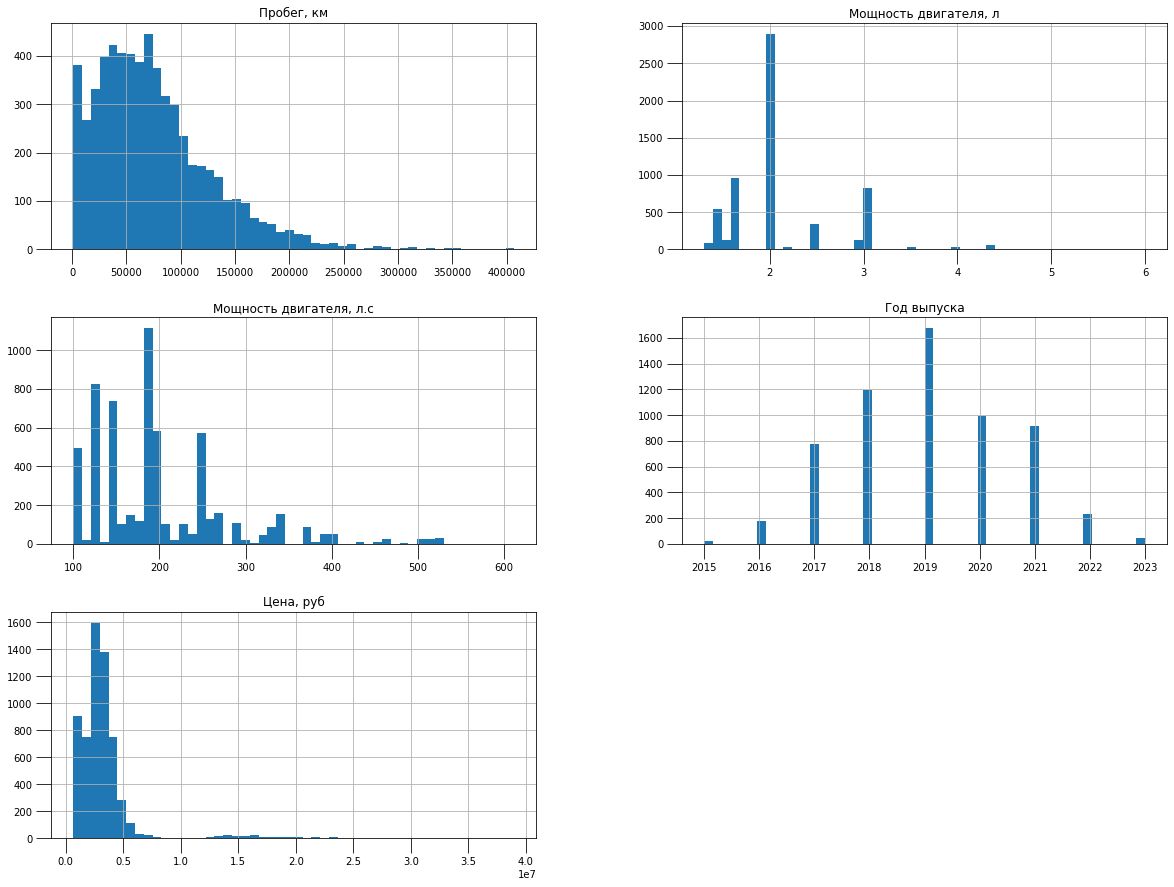

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize'] = (14,9)
plt.rcParams['ytick.major.size'] = 15
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['text.color'] = 'black'

numeric_columns = ['Пробег, км','Мощность двигателя, л','Мощность двигателя, л.с','Год выпуска','Цена, руб']
df[numeric_columns].hist(figsize =(20,15), bins = 50);

## Можно увидеть, что больше всего машин с пробегом примерно 75000 км, мощностью двигателя 2.0 в литрах и 180 в лошадиных силах, 2019 года выпуска, а также стоимостью около 3 млн рублей

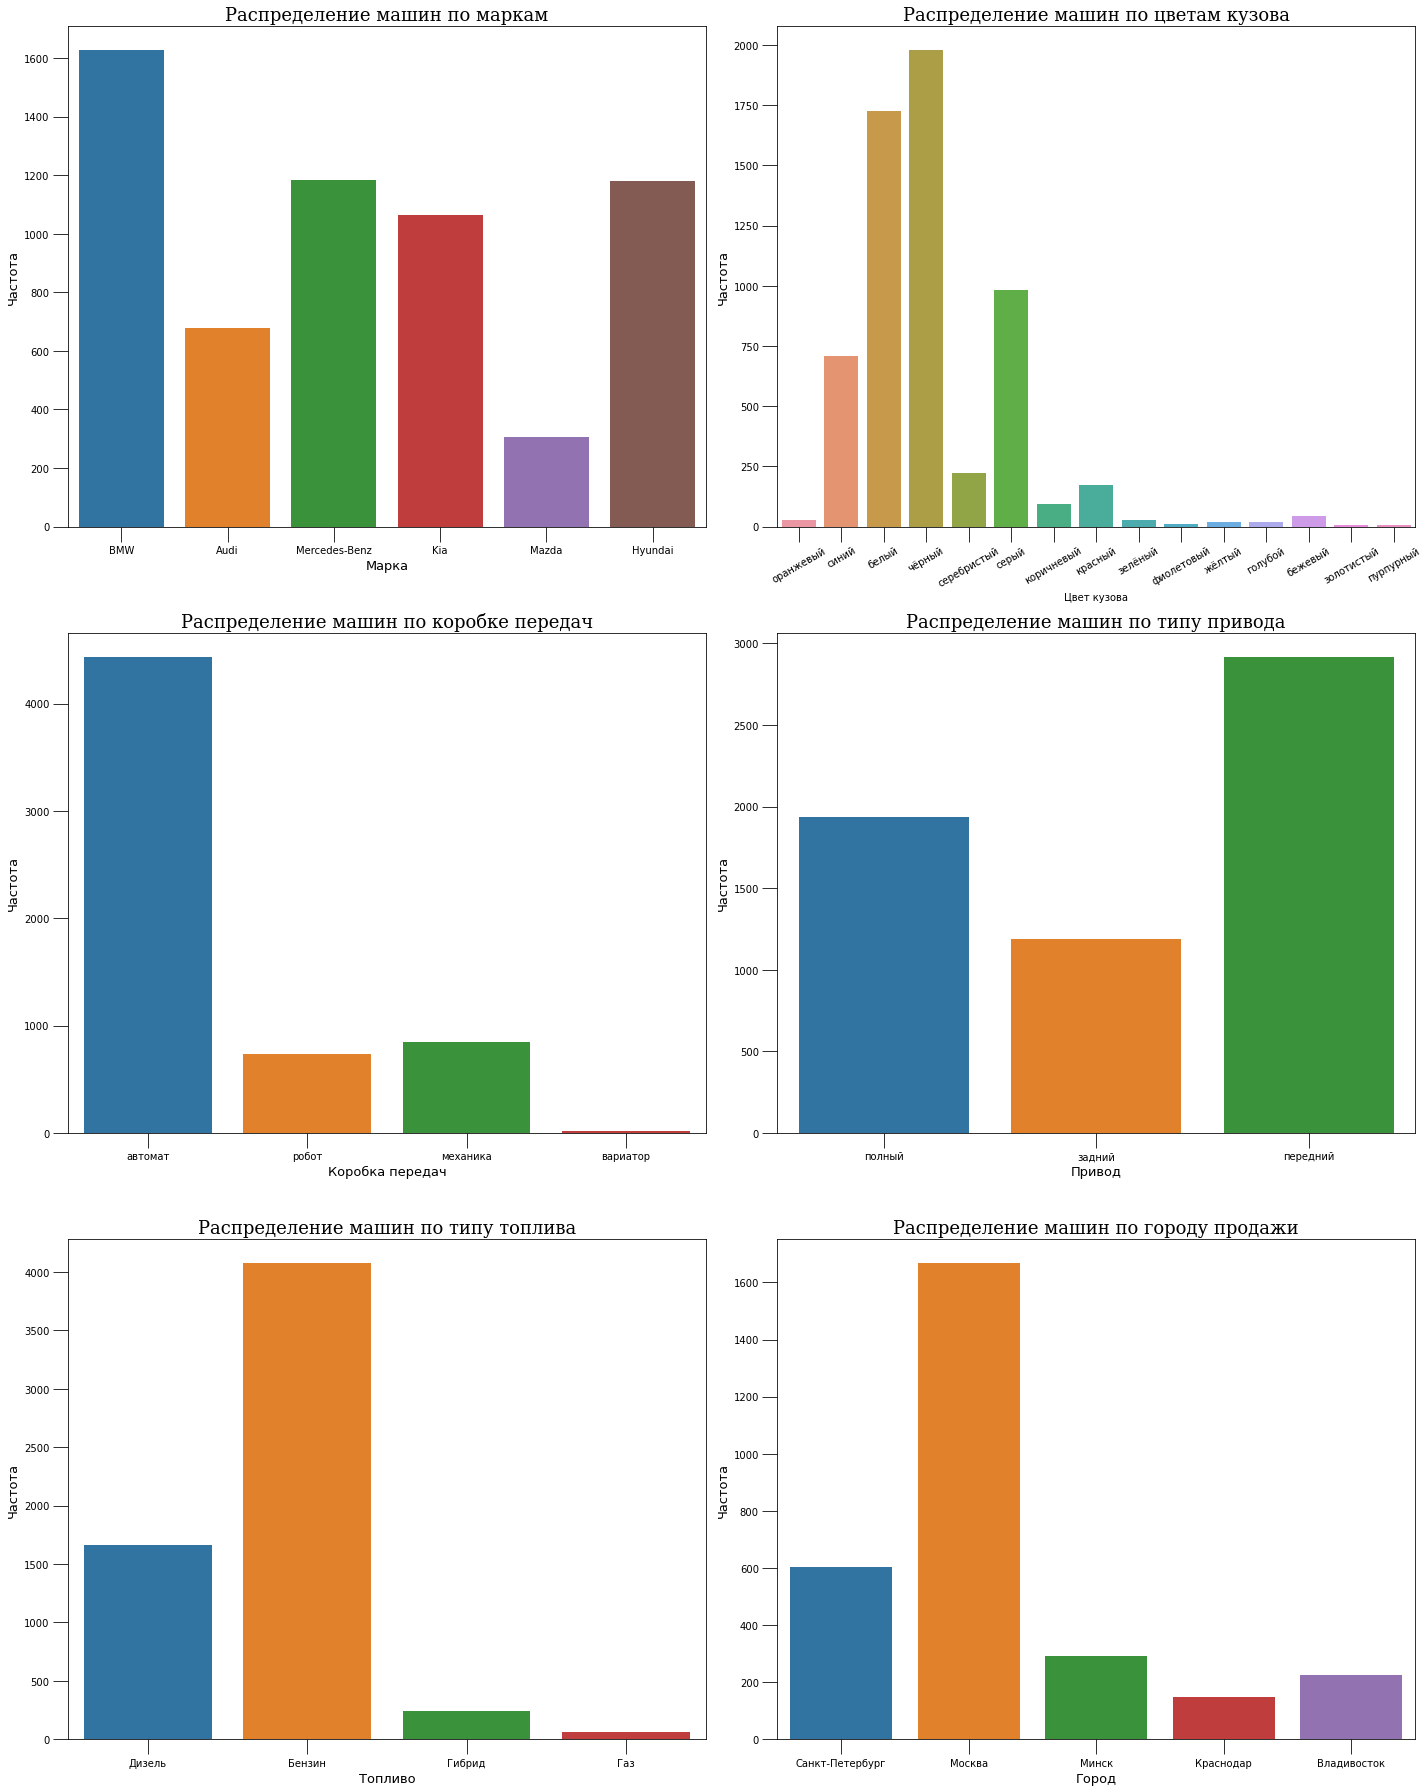

In [217]:
fig, ax = plt.subplots(3,2,figsize = (20,25))

sns.countplot(x = df['Марка'], data = df, ax = ax[0,0])
ax[0,0].set_title('Распределение машин по маркам', fontsize = 18, fontfamily = 'serif')
ax[0,0].set_xlabel('Марка', fontsize = 13)
ax[0,0].set_ylabel('Частота', fontsize = 13 )

sns.countplot(x = df['Цвет кузова'], data = df, ax = ax[0,1])
x = df['Цвет кузова'].unique()
ax[0,1].set_title('Распределение машин по цветам кузова', fontsize = 18, fontfamily = 'serif')
ax[0,1].set_ylabel('Частота', fontsize = 13)
ax[0,1].set_xticklabels(x,rotation = 30)

sns.countplot(x = df['Коробка передач'], data = df, ax = ax[1,0])
ax[1,0].set_title('Распределение машин по коробке передач', fontsize = 18, fontfamily = 'serif')
ax[1,0].set_xlabel('Коробка передач', fontsize = 13)
ax[1,0].set_ylabel('Частота', fontsize = 13)

sns.countplot(x = df['Привод'], data = df, ax = ax[1,1])
ax[1,1].set_title('Распределение машин по типу привода', fontsize = 18, fontfamily = 'serif')
ax[1,1].set_xlabel('Привод', fontsize = 13)
ax[1,1].set_ylabel('Частота', fontsize = 13)

sns.countplot(x = df['Тип топлива'], data = df, ax = ax[2,0])
ax[2,0].set_title('Распределение машин по типу топлива', fontsize = 18, fontfamily = 'serif')
ax[2,0].set_xlabel('Топливо', fontsize = 13)
ax[2,0].set_ylabel('Частота', fontsize = 13)


#выведем 5 наиболее часто встречаемых городов

top5_cities = df['Город продажи'].value_counts().head(5).index.tolist()
df_cities = df[df['Город продажи'].isin(top5_cities)]

sns.countplot(x = df_cities['Город продажи'], data = df_cities, ax = ax[2,1])
ax[2,1].set_title('Распределение машин по городу продажи', fontsize = 18, fontfamily = 'serif')
ax[2,1].set_xlabel('Город', fontsize = 13)
ax[2,1].set_ylabel('Частота', fontsize = 13)


plt.tight_layout()
plt.show()

## Проанализировав распределения категориальных признаков, мы не заметили каких-либо "сюрпризов":

- Самыми популярными марками автомобилей являются BMW, Mercedes и Hyndai. В целом, это говорит о количсестве машин определенного холдинга на рынке (так как мы брали все объявления по конкретной марке).
- По цвету также все стандартно: традиционно черные (около 2000 машин), белые (примерно 1700) и серые (около 1000 автомобилей) машины являются наиболее востребованными на российском рынке.
- Коробка передач типа 'автомат' с оргомным отрывом более 4000 машин) опережает другие варинты (механика – 750, робот - 600)
- Распределение остальных категориальных признаков в приниципе также стандартно: большинство машин имеет передний привод, работают на бензине и выставлены на продажу в Москве

    Уже на гистограммах распределения числовых признаков можно увидеть некоторые выбросы у переменных "пробег", "мощность двигателя, л.c" и "цена". Проверим это, построив "ящики с усами".

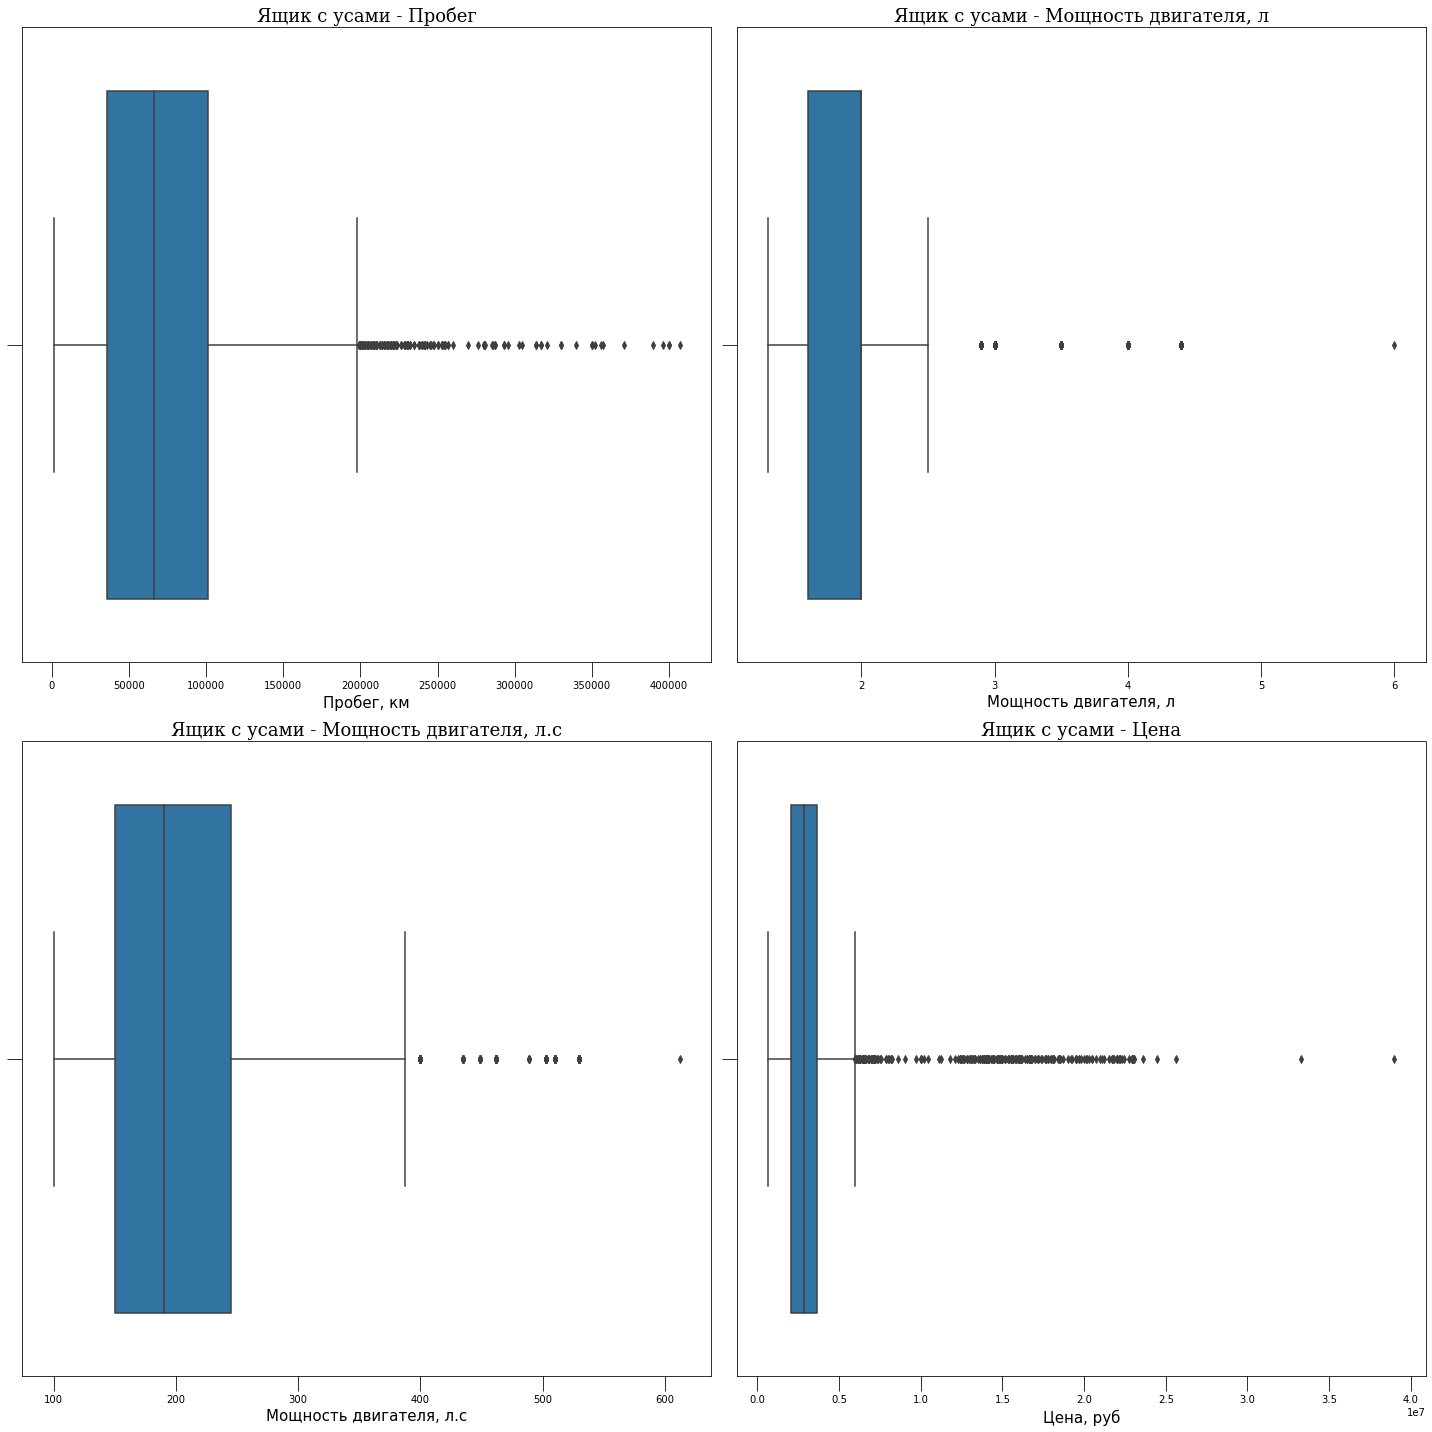

In [216]:
fig, ax = plt.subplots(2,2,figsize = (20,20))


sns.boxplot(data=df, x='Пробег, км', ax=ax[0,0])
ax[0,0].set_title('Ящик с усами - Пробег', fontsize = 18, fontfamily = 'serif')
ax[0,0].set_xlabel('Пробег, км', fontsize = 15)

sns.boxplot(data=df, x='Мощность двигателя, л', ax=ax[0,1])
ax[0,1].set_title('Ящик с усами - Мощность двигателя, л', fontsize = 18, fontfamily = 'serif')
ax[0,1].set_xlabel('Мощность двигателя, л', fontsize = 15)

sns.boxplot(data=df, x='Мощность двигателя, л.с', ax=ax[1,0])
ax[1,0].set_title('Ящик с усами - Мощность двигателя, л.с', fontsize = 18, fontfamily = 'serif')
ax[1,0].set_xlabel('Мощность двигателя, л.с', fontsize = 15)

sns.boxplot(data=df, x='Цена, руб', ax=ax[1,1])
ax[1,1].set_title('Ящик с усами - Цена', fontsize = 18, fontfamily = 'serif')
ax[1,1].set_xlabel('Цена, руб', fontsize = 15)

plt.tight_layout()
plt.show()

## Из данных графиков видно, что действительно большое количество отклонений от основного распредделения имеют переменные "пробег" и "цена": множество точек правее квантиля указывают нам на это. Если говорить о цене, то выбросы закономерны: мы брали машины среднего и премиум класса. Cредний, в свою очередь, "тянет одеяло на себя".

    Исследуем влияние переменных на наиболее интересуюший нас показатель: цену. Для начала, построим корреляционную матрицу для числовых признаков и визуализируем ее. Далее, построим несколько диаграмм рассеивания, чтобы лучше увидеть взаимосвязь перемнных. Наконец, построим гистограммы средней цены автомобилей в заисмости от цвета (возможно, выявим интересные закономерности)

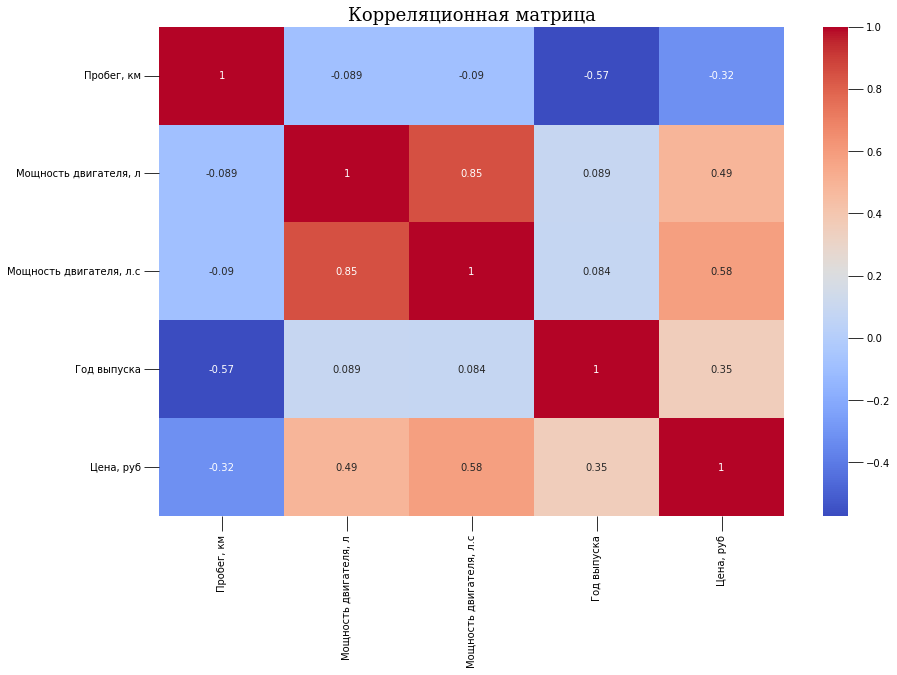

In [222]:
numeric_data = df[numeric_columns]

corr_matrix = numeric_data.corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Корреляционная матрица', fontsize = 18, fontfamily = 'serif')

plt.show()

   ## Результаты удручают: цена не имеет сильной линейной связи ни с одним числовым признаком. Например, казалось бы, что между пробегом и ценой должна быть сильная обратная линейная связь, однако значение -0.32 нельзя назвать достаточным для такого вывода. Вероятно, это также свзязано с различным классом представленных в выборке автомобилей: у некоторых машин премиум класса, например, с пробегом 100000км цена снижается гораздо меньше, чем у машин среднего класса с тем же пробегом (лишь предположение).

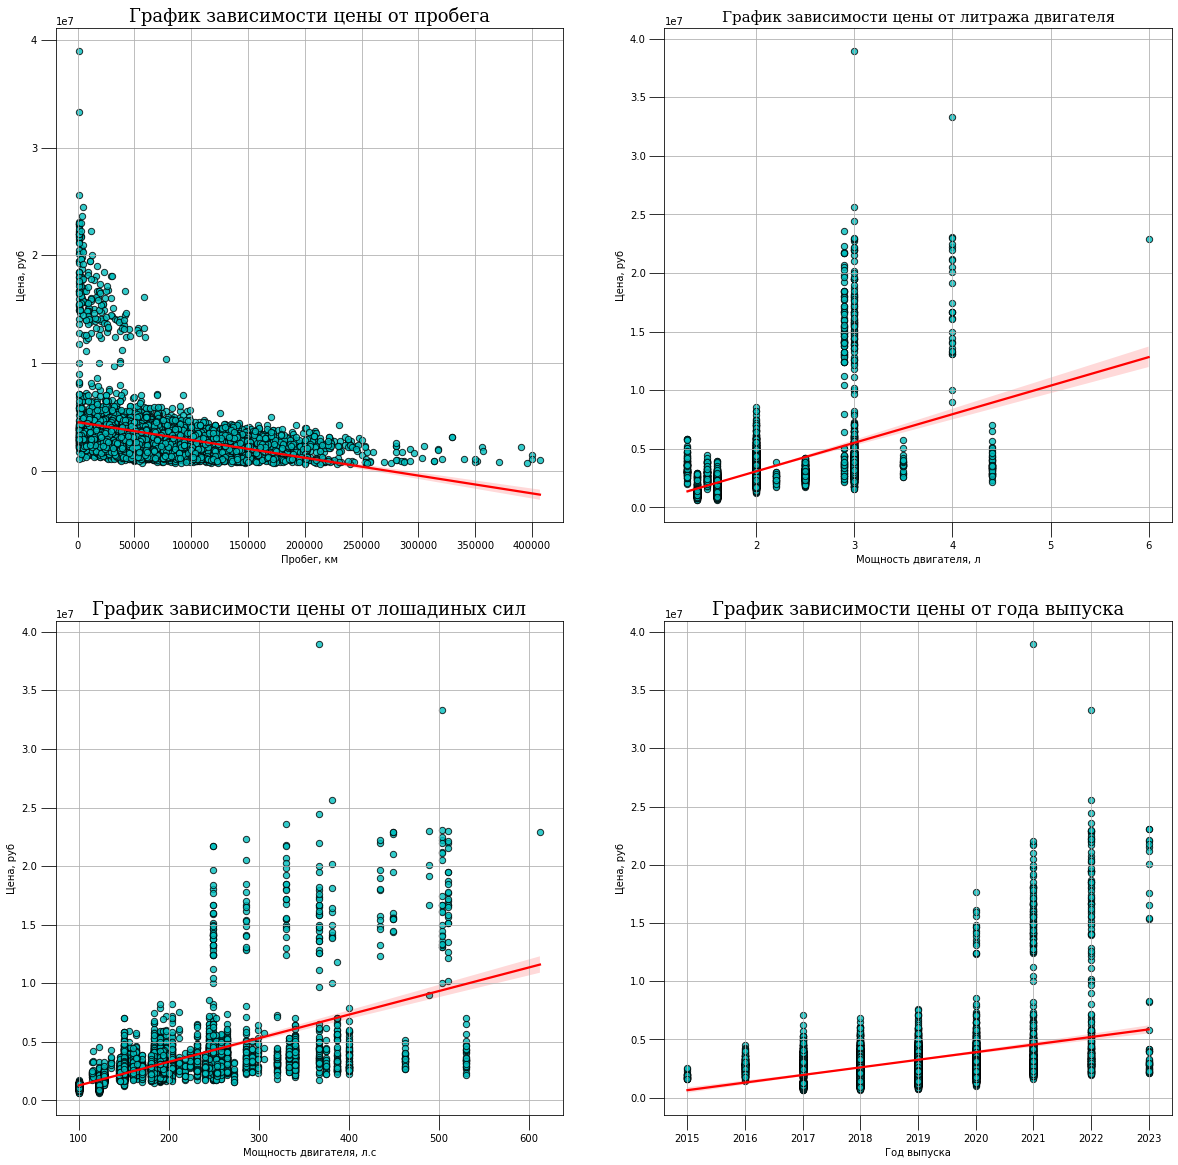

In [254]:
#sns.scatterplot(data = df, x = 'Пробег, км', y = 'Цена, руб')


fig, ax = plt.subplots(2,2,figsize = (20,20))

x1 = df['Пробег, км']
y = df['Цена, руб']

sns.regplot(x = x1, y = y, scatter_kws = {'s': 40, 'color':'c', 'edgecolor': 'black'}, line_kws = {'color':'red'}, ax = ax[0,0])
ax[0,0].set_title('График зависимости цены от пробега', fontsize = 18, fontfamily = 'serif')
ax[0,0].grid()

x2 = df['Мощность двигателя, л']
sns.regplot(x = x2, y = y, scatter_kws = {'s': 40, 'color':'c', 'edgecolor': 'black'}, line_kws = {'color':'red'}, ax = ax[0,1])
ax[0,1].set_title('График зависимости цены от литража двигателя', fontsize = 15, fontfamily = 'serif')
ax[0,1].grid()

x3 = df['Мощность двигателя, л.с']
sns.regplot(x = x3, y = y, scatter_kws = {'s': 40, 'color':'c', 'edgecolor': 'black'}, line_kws = {'color':'red'}, ax = ax[1,0])
ax[1,0].set_title('График зависимости цены от лошадиных сил', fontsize = 18, fontfamily = 'serif')
ax[1,0].grid()

x4 = df['Год выпуска']
sns.regplot(x = x4, y = y, scatter_kws = {'s': 40, 'color':'c', 'edgecolor': 'black'}, line_kws = {'color':'red'}, ax = ax[1,1])
ax[1,1].set_title('График зависимости цены от года выпуска', fontsize = 18, fontfamily = 'serif')
ax[1,1].grid()



plt.show()

## Видим, что диаграмма рассеивания не совсем подходит для переменных "мощность двигателя" и "год выпуска", так как разнообразие значений невелико. Однако построенные тренды отражают существующую линейную зависимость.

### Гипотезы:

пока еще не определились, но вот возможные варинты для проверки:

- Гипотеза о различии цен в разных городах (взять, например, Мск и Спб и использовать разницу матожиданий)

- Гипотеза: автомобили mercedes в среднем дороже автомобилей BMW (взять, например, 2 марки: E-Класс и 5 серию)

- Можно в целом проверить гипотезу о влиянии марки авто на его цену. Например, есть ли статистически значимая разница в цене между рахными маркаими (с помощью anova или теста на сравнение средних)

- Гипотеза о влиянии типа топлива на мощность двигателя. Опять же, есть ли статистически значимая разница в мощности двигателя в зависимости от типа топлива.

### 